In [1]:
# First regression excercise
#
# Common imports
#import sys
#import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# import sklearn lib
import sklearn

We set a seed so we get consistent numbers every time we run the code. The number 50 is totally arbitrary. This does not guarantee that the program will get the same number for every pc in this room, today

In [3]:
# to generate always the same random numbers (results reproducible)
np.random.seed(50)

We generate a simple dataset made of 100 items (relatively small) from -3 to +3 and then we generate first X and a target that is called y. we generate a quadratic function + a random noise

In [4]:
# Generate dataset (quadratic random data, i.e. y=0.5X^2+X+2 random noise) 
m = 100  # the number of items in the dataset
X = 6 * np.random.rand(m, 1) - 3    # generate 100 random numbers from -3 to +3
# now compute y for each X value from the equation and add a random "noise"
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) 
y.shape

(100, 1)

In [5]:
X.shape

(100, 1)

Thus we generated an array of arrays x and y

In [6]:
X

array([[-3.23901268e-02],
       [-1.63150137e+00],
       [-1.46715646e+00],
       [-6.22020542e-01],
       [-7.36109414e-01],
       [ 2.97944538e+00],
       [-5.50816798e-01],
       [ 1.63136397e+00],
       [ 1.56322013e+00],
       [-1.13994391e+00],
       [-9.20752773e-01],
       [-8.89411095e-01],
       [-2.12719886e+00],
       [ 2.83598811e+00],
       [ 2.45507063e+00],
       [ 3.59742622e-01],
       [-1.11845552e+00],
       [ 2.32920023e+00],
       [ 1.04743839e+00],
       [-6.53475314e-01],
       [ 4.31047435e-02],
       [ 1.44621016e-01],
       [ 2.56800557e+00],
       [ 4.28238414e-01],
       [ 1.01002541e+00],
       [-2.68644785e+00],
       [-1.03765618e+00],
       [-2.66159016e+00],
       [-1.92103384e+00],
       [ 2.55559904e+00],
       [ 2.62809134e+00],
       [ 1.28455624e+00],
       [ 1.39612565e+00],
       [-2.29513942e-01],
       [ 2.58797561e+00],
       [-5.61478540e-01],
       [ 1.09923462e+00],
       [ 8.99495209e-01],
       [ 5.9

In [7]:
y

array([[ 1.91558365],
       [ 1.06511591],
       [ 1.24618647],
       [-0.99948553],
       [ 1.67233386],
       [ 8.69869658],
       [ 2.32940566],
       [ 6.58378365],
       [ 6.30671096],
       [ 0.20301872],
       [ 0.61337176],
       [ 1.51138269],
       [ 3.00171351],
       [ 8.3218668 ],
       [ 7.2106076 ],
       [ 2.47160616],
       [ 1.07995071],
       [ 6.9205541 ],
       [ 3.42742744],
       [ 1.36414075],
       [ 1.85069064],
       [ 2.45170874],
       [ 7.10508644],
       [ 0.0752167 ],
       [ 2.98956378],
       [ 3.76439878],
       [ 1.33592295],
       [ 1.59633921],
       [ 2.12432315],
       [ 8.66965133],
       [ 6.37167795],
       [ 2.52592955],
       [ 3.27021933],
       [ 0.63956684],
       [ 9.74482933],
       [ 0.48497192],
       [ 4.57380835],
       [ 4.05301386],
       [ 3.47770573],
       [ 2.03910357],
       [ 2.91450324],
       [ 6.30505445],
       [ 4.19121178],
       [ 0.74044378],
       [ 6.55042938],
       [ 5

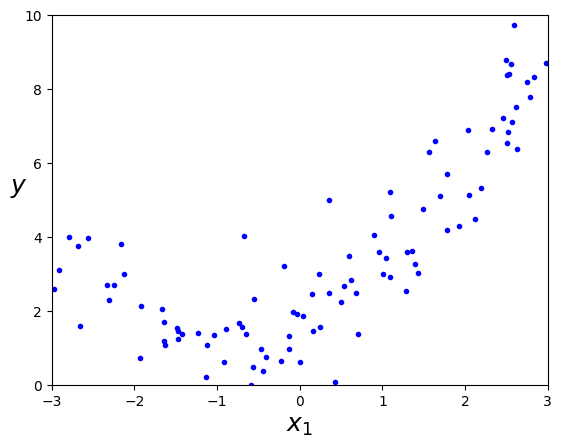

In [8]:
# Plot the data with matplotlib
plt.plot(X, y, "b.")  # b. is for blue point
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [9]:
# if I want to save numpy arrays and matrices to files:
X.tofile('X.csv', sep = ',')
y.tofile('y.csv', sep = ',')

the splitting is random using train_test_split, where 20% of the data set inside the test set and we set another random seed (in this case 42). The function returns 4 objects: X_train, X_test, y_train, y_test making up the tran and the test sets

In [10]:
# Split the training set into two subsets (training set and test set)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape # the object is containing 80 items

(80, 1)

In [11]:
X_train[0]

array([-1.92828479])

In [12]:
X_test.shape

(20, 1)

In [13]:
X_test[0]

array([-2.3110863])

Now we decide which model we want to use. Here we used a quadratic function, but we start trying a linear function because it's the simplest

In [14]:
#Let's first try to train a linear model y=a*X^1+b
from sklearn.linear_model import LinearRegression # we import the LinearRegression class

lin_reg = LinearRegression()  # we create an instance of this class called lin_reg
lin_reg.fit(X_train, y_train)  # training step! All in this simple command calling the method
                                # fit on the object lin_reg and we pass the training data X_train and y_train

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Now let's see the coefficient of the linear fit
lin_reg.intercept_, lin_reg.coef_

(array([3.12611672]), array([[1.18153783]]))

In [16]:
# This means that our model is: y=3.12611672 + x1*1.18153783

In [17]:
# If we want to use the model now to predict the output for a new value 
# (for example -1.5 here) we can use the "predict" method
# of the linear regressor (and of any regressor)
# However, if we try this:
# y_pred_lin = lin_reg.predict(-1.5)

In [18]:
# as you can see, you get an error... this is because the type of data that
# you pass to the predict method must be the same as for the training data.
# So a little work is necessary first:

X_new0 = np.array([-1.5]).reshape(1,1)  # we first create a numpy array with a single element with value -1.5, then we 
                                        # reshape it into a (1,1) matrix
X_new0

array([[-1.5]])

In [19]:
y_pred_lin = lin_reg.predict(X_new0)          # and now the predict method
y_pred_lin

array([[1.35380997]])

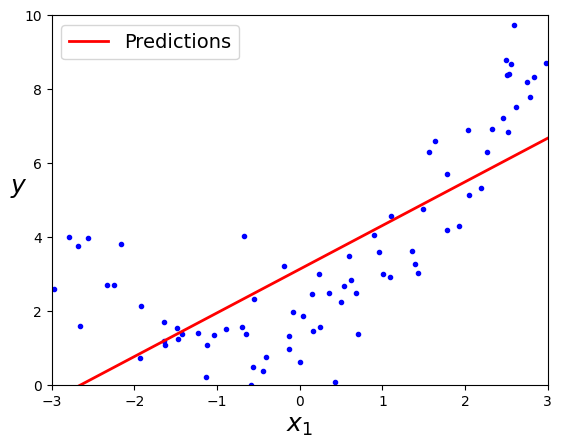

In [20]:
# Plot the data and the predictions for the training set
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_new = lin_reg.predict(X_new)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

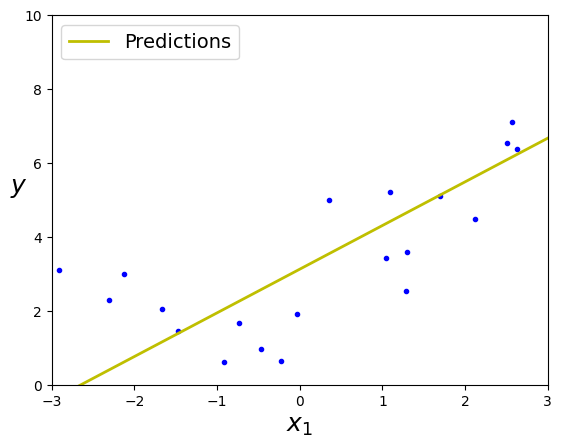

In [21]:
# Plot the data and the predictions for the test set
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_new = lin_reg.predict(X_new)
plt.plot(X_test, y_test, "b.")
plt.plot(X_new, y_new, "y-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Is the model good or not? We compute the mean square error for the train and test sets

In [22]:
# first we compute the MSE on the training set
from sklearn.metrics import mean_squared_error

y_train_pred = lin_reg.predict(X_train)
MSE_train_lin = mean_squared_error(y_train, y_train_pred)
MSE_train_lin

3.17347850052231

In [23]:
# we compute the MSE on the test set
y_test_pred = lin_reg.predict(X_test)

MSE_test_lin = mean_squared_error(y_test, y_test_pred)
MSE_test_lin

2.2392620675899506

In [24]:
# Now we want to train a 2nd order polynomial model on the same data...
# We do this with a trick, we create a new feature with the square of x1
# So, we tranform the features, from one features only (x1) 
# to two features (x1^2, x1)
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_train_poly.shape

(80, 2)

^ we recast the quadratic problem into a linear model. The PolynomialFeatures class does exactly this. Now th matrix is 80x2 because we have 2 features: x1 ad its squared

In [25]:
# the first item in X is -1.92828479 (x1)
X_train[0]

array([-1.92828479])

In [26]:
# the first item in X_poly is [-1.92828479,  3.71828222] for  x1 and x1^2 resepctively
X_train_poly[0]

array([-1.92828479,  3.71828222])

In [27]:
# Now let's train a linear regression model using the new polynomial features (x1, x1^2) 
#from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Now let's see the coefficient of the linear fit
lin_reg2.intercept_, lin_reg2.coef_

(array([1.60661399]), array([[0.98687781, 0.56272053]]))

In [29]:
# This means that our model is: y=1.60661399 + x1*0.98687781 + x1^2 * 0.56272053

In [30]:
# If we want to use the model now to predict the output for a new value x_new we can use the "predict" method
# of the linear regressor (and of any regressor)
# However, if we try this:
# y_pred0 = lin_reg2.predict(-1.5)

In [31]:
# as you can see, you get an error... this is because the type of data that you pass to the predict method 
# must be the same as for the training data.
# So a little work is necessary first:

X_new0 = np.array([-1.5]).reshape(1,1)  # we first create a numpy array with a single element with value -1.5, then we 
                                        # reshape it into a (1,1) matrix
X_new0

array([[-1.5]])

In [32]:
X_new_poly0 = poly_features.transform(X_new0)   # we can now apply the polynomial transformation...
y_pred0 = lin_reg2.predict(X_new_poly0)          # and now the predict method
y_pred0

array([[1.39241847]])

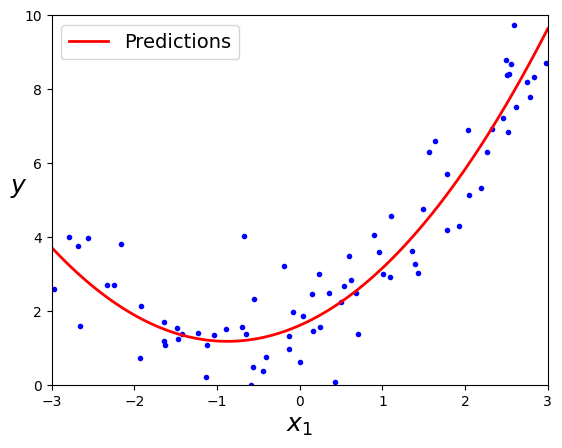

In [33]:
# Plot the data and the predictions for the training set
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg2.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()


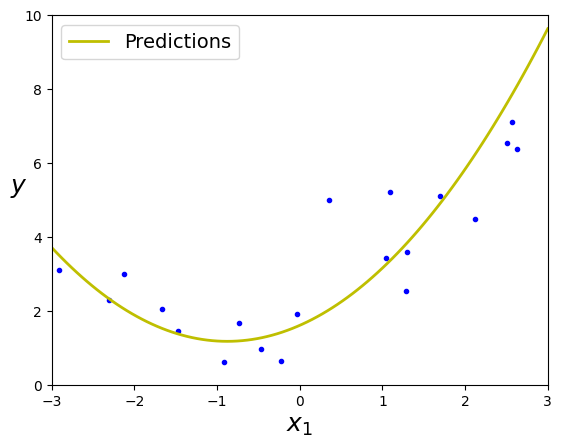

In [34]:
# Plot the data and the predictions for the test set
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg2.predict(X_new_poly)
plt.plot(X_test, y_test, "b.")
plt.plot(X_new, y_new, "y-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [35]:
# first we compute the MSE on the training set
from sklearn.metrics import mean_squared_error

y_train_pred = lin_reg2.predict(X_train_poly)
MSE_train_quad = mean_squared_error(y_train, y_train_pred)
MSE_train_quad

0.9641333137343974

In [36]:
# we compute the MSE on the test set
y_test_pred = lin_reg2.predict(X_test_poly)

MSE_test_quad = mean_squared_error(y_test, y_test_pred)
MSE_test_quad

1.2185448112230612

In [39]:
# TODO: How do the MSE_train and MSE_test compare between the linear and quadratic model?

diff_test = MSE_test_lin - MSE_test_quad

diff_train = MSE_train_lin - MSE_train_quad

print(diff_test, diff_train)
print(MSE_test_lin, MSE_train_lin, MSE_test_quad, MSE_test_quad)

# As we can see, diff_test and diff_train are positive, so the MSE_train and MSE_test for the quadratic model are smaller, so the quadratic model works better than the linear one

#Results:

# 1.0207172563668894 2.2093451867879126
# 2.2392620675899506 3.17347850052231 1.2185448112230612 1.2185448112230612

1.0207172563668894 2.2093451867879126
2.2392620675899506 3.17347850052231 1.2185448112230612 1.2185448112230612


In [ ]:
# TODO: try to change the size of the datasets (m=50, 200, 500) and see how MSE_train and MSE_test change

# m = 50: 
# MSE_test_lin = 3.0452415360835223
# MSE_train_lin = 2.2417825966219285
# MSE_train_quad = 1.29429886192128
# MSE_test_quad = 0.8737396803842106

# m = 200:
# MSE_test_lin = 3.3595688347104753
# MSE_train_lin = 2.360238885945961
# MSE_train_quad = 0.8832202847288407
# MSE_test_quad = 1.186704753365037

# m = 500:
# MSE_test_lin = 2.723415144574353
# MSE_train_lin = 2.762979804813175
# MSE_train_quad = 1.08482500556022
# MSE_test_quad = 0.8517937999805811


In [ ]:
# Now let's try another ML model, a first decision tree regressor model
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
# let's create a function for plotting the results
def plot_regression_predictions(model, X, y, axes=[-3, 3, -0.2, 10], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = model.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    

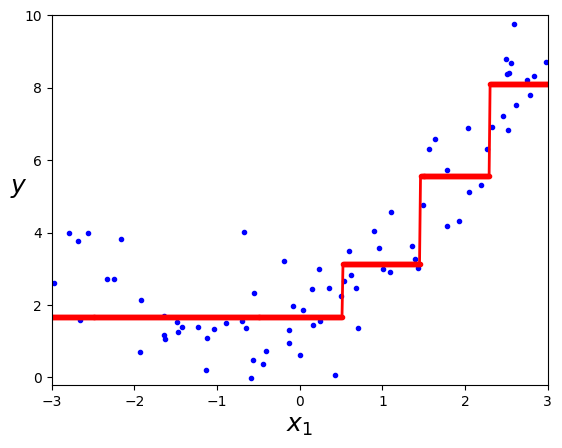

In [ ]:
# now we use the function to plot the results
plot_regression_predictions(tree_reg1, X_train, y_train)

The red line is the result of the decision tree : better than the linear fit, but worse than the quadratic

In [ ]:
# and we compute the MSE for the training set and for the
y_train_pred = tree_reg1.predict(X_train)
MSE_train_treereg1 = mean_squared_error(y_train, y_train_pred)
y_test_pred = tree_reg1.predict(X_test)
MSE_test_treereg1 = mean_squared_error(y_test, y_test_pred)
print(MSE_train_treereg1, MSE_test_treereg1)

1.1295118922059164 1.5512068811220137


In [ ]:
# Now let's try another decisiton tree regressor model, with max_depth=3 
from sklearn.tree import DecisionTreeRegressor

tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_train, y_train)x

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


As we can see, the prediction is getting better

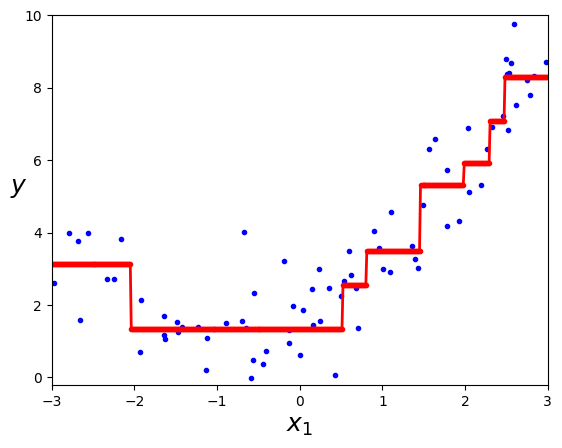

In [ ]:
# and we plot the results again
plot_regression_predictions(tree_reg2, X_train, y_train)

Over fitting seen from the MSE for the training data, which is bigger than the one of the quadratic model

In [ ]:
# Compute MSE or similar and compare
# and we compute the MSE for the training set and for the
y_train_pred = tree_reg2.predict(X_train)
MSE_train_treereg2 = mean_squared_error(y_train, y_train_pred)
y_test_pred = tree_reg2.predict(X_test)
MSE_test_treereg2 = mean_squared_error(y_test, y_test_pred)
print(MSE_train_treereg2, MSE_test_treereg2)

0.7857284899068049 1.5215691660985302


In [ ]:
# optional code for generating a visualization for the tree

from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg1,
        out_file=("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

In [38]:
# from graphviz import Source
# Source.from_file("regression_tree.dot")

In [ ]:
# Decision trees overfitting...

tree_reg3 = DecisionTreeRegressor(random_state=42)   # no regularization
tree_reg4 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)    # with regularization
tree_reg3.fit(X_train, y_train)
tree_reg4.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


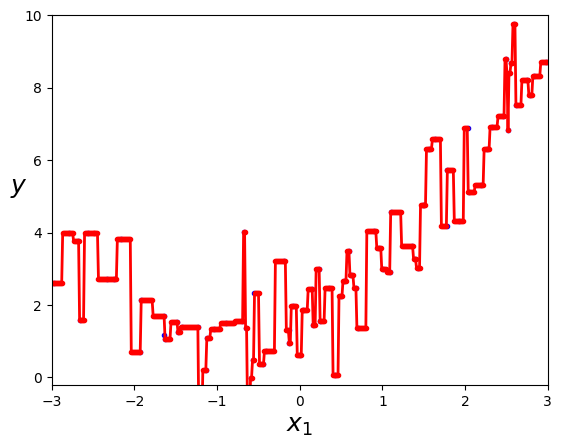

In [ ]:
plot_regression_predictions(tree_reg3, X_train, y_train)

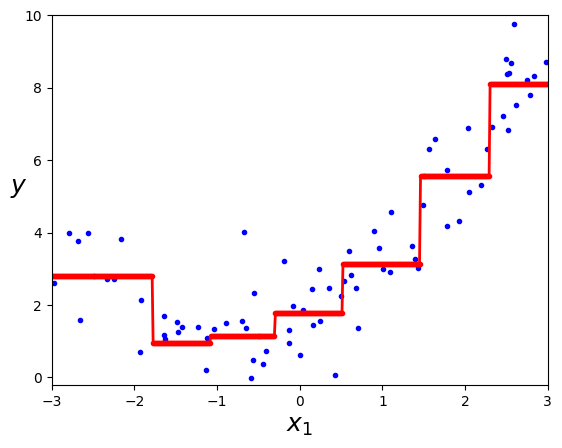

In [ ]:
plot_regression_predictions(tree_reg4, X_train, y_train)

In [ ]:
#TODO: Compute the MSE for tree_reg3 and tree_reg4 models, both on the training set and on the test set

y_train_pred = tree_reg3.predict(X_train)
MSE_train_treereg3 = mean_squared_error(y_train, y_train_pred)
y_test_pred = tree_reg3.predict(X_test)
MSE_test_treereg3 = mean_squared_error(y_test, y_test_pred)
print(f'MSE_train_treereg3 = {MSE_train_treereg3}, MSE_test_treereg3 = {MSE_test_treereg3}')

y_train_pred = tree_reg4.predict(X_train)
MSE_train_treereg4 = mean_squared_error(y_train, y_train_pred)
y_test_pred = tree_reg4.predict(X_test)
MSE_test_treereg4 = mean_squared_error(y_test, y_test_pred)
print(f'MSE_train_treereg4 = {MSE_train_treereg4}, MSE_test_treereg4 = {MSE_test_treereg4}')

'''

Results m = 100:
MSE_train_treereg3 = 0.0, MSE_test_treereg3 = 1.6881977749094728
MSE_train_treereg4 = 0.8665046775545733, MSE_test_treereg4 = 1.342863714759386

'''

In [ ]:
# Last, let's try a Random Forest regressor model
from sklearn.ensemble import RandomForestRegressor

rf_reg1 = RandomForestRegressor(random_state=42)
rf_reg1.fit(X, y)

c:\Users\capel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# We got an error here... this is because y is a (100,1) matrix but the RandomForestRegressor wants a 1-D array
y.shape

(100, 1)

In [ ]:
# flatten the (100,1) matrix y into y2. See https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
y2 = y.ravel()

In [ ]:
y2.shape

(100,)

In [ ]:
# each element of y is an array of numbers...
y[0]

array([1.91558365])

In [ ]:
# each element of y2 is a number...
y2[0]

np.float64(1.9155836485952729)

In [ ]:
# now we can train the Random Forest
rf_reg1.fit(X, y2)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


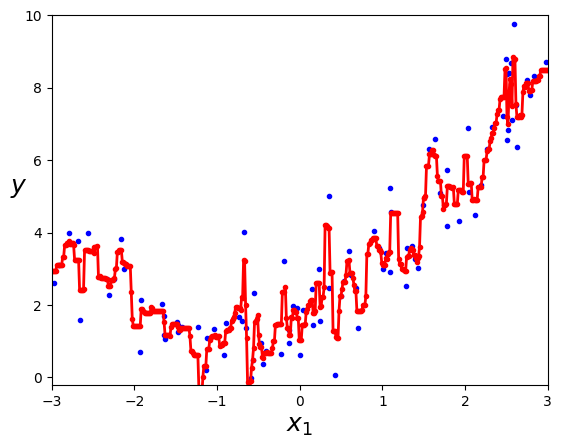

In [ ]:
plot_regression_predictions(rf_reg1, X, y2)

In [ ]:
#TODO: Look the online documentation of random forests in the scikitlearn library, find other hyperparameters 
# Train 2 more random forests regularizing other hyperparameters. Plot the results and compute MSE on both training and test set.

In [ ]:
#TODO: Train a sequence of random forests with different values of the hyperparameter "n_estimators" (20, 50, 100, 200, 300). 
# In each case, compute the MSE on both the training set and the test set. Plot both MSEs vs n_estimators.
# How can I find the optimal value for the hyperparameter "n_estimators"?

In [ ]:
#TODO (optional): As I have many hyperparameters in a Random Forest model, how can I find the best values for all of them? 
# Repeat the above exercise with another hyperparameter. 